In [1]:
import pandas as pd
from utils import data_process
import seaborn as sns

%matplotlib inline
sns.set()

Let's take a look at the data:

In [2]:
train_tokens, train_tags = data_process.parse_file("/Users/sarah/PycharmProjects/entity_recognition/data/CONLL2003/train.txt")
print(train_tags[:5])
print(train_tokens[:5])

[['B-PER', 'I-PER'], ['B-LOC', 'O'], ['O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'B-MISC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['B-LOC', 'O', 'O', 'O', 'O', 'B-ORG', 'I-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-ORG', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'I-PER', 'O', 'O', 'O', 'O', 'O']]
[['Peter', 'Blackburn'], ['BRUSSELS', '1996-08-22'], ['The', 'European', 'Commission', 'said', 'on', 'Thursday', 'it', 'disagreed', 'with', 'German', 'advice', 'to', 'consumers', 'to', 'shun', 'British', 'lamb', 'until', 'scientists', 'determine', 'whether', 'mad', 'cow', 'disease', 'can', 'be', 'transmitted', 'to', 'sheep', '.'], ['Germany', "'s", 'representative', 'to', 'the', 'European', 'Union', "'s", 'veterinary', 'c

I see lots of O's. Let's look at tag distribution:

In [3]:
flattened_tags = data_process.flatten(train_tags)
flattened_tokens = data_process.flatten(train_tokens)

In [4]:
tokens_and_tags = pd.DataFrame(list(zip(flattened_tokens, flattened_tags)), columns=["token", "tag"])
print(tokens_and_tags.head())
print(tokens_and_tags.shape)

        token    tag
0       Peter  B-PER
1   Blackburn  I-PER
2    BRUSSELS  B-LOC
3  1996-08-22      O
4         The      O
(203608, 2)


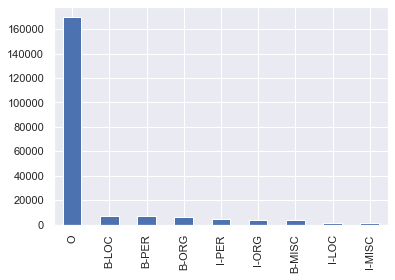

In [5]:
tags_dist = pd.Series(flattened_tags)
tags_dist.value_counts().plot(kind='bar')

Around 83% of the data is the outside tag 'O'. Something to keep in mind during training. 

In [6]:
tags_dist.value_counts().apply(lambda row: row / tokens_and_tags.shape[0])

O         0.832826
B-LOC     0.035067
B-PER     0.032415
B-ORG     0.031030
I-PER     0.022239
I-ORG     0.018192
B-MISC    0.016876
I-LOC     0.005682
I-MISC    0.005673
dtype: float64

Looking at a histogram of sentence length, most sentences are pretty short.

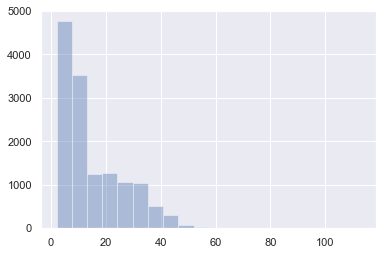

In [7]:
sentence_lengths = [len(s) for s in train_tokens]
sentence_length_dist = pd.Series(sentence_lengths)
sns.distplot(sentence_length_dist, bins=20, kde=False)


Let's look at the tags a bit, starting with location since the "client" is a travel data broker.

In [8]:
# investigate tags
location_tokens = tokens_and_tags[tokens_and_tags["tag"].isin(["B-LOC", "I-LOC"])]
print(location_tokens["token"].value_counts().head(10))

U.S.         309
Germany      142
Britain      133
Australia    130
England      124
France       122
Spain        110
Italy         98
New           95
LONDON        93
Name: token, dtype: int64


In [9]:
# investigate tags
# 'of' is clearly an inner token
org_tokens = tokens_and_tags[tokens_and_tags["tag"].isin(["B-ORG", "I-ORG"])]
print(org_tokens["token"].value_counts().head(10))

of          104
Reuters      79
Newsroom     70
Inc          61
St           52
Corp         49
Party        49
New          49
United       48
National     48
Name: token, dtype: int64


What about those inner tags?


In [10]:
# inner tags
inner_tokens = tokens_and_tags[tokens_and_tags["tag"].str.startswith("I")]
print(inner_tokens["token"].value_counts().head(10))

of          134
YORK         95
Cup          80
Newsroom     70
York         67
Bank         62
Open         60
States       60
Inc          60
Africa       59
Name: token, dtype: int64


I'm not spending too much time here because named entity recognition using IOB has a pretty standard solution: bi-directional LSTM. Onward!